In [4]:
import pandas as pd
import anndata as ad
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cmx
import scanpy.external as sce
import seaborn as sns

In [19]:
df1 = pd.read_csv('../data/2025/IPSCs 13 and 16 batch.pg_matrix.tsv', sep='\t')
df1.head()

,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293.d,...,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RK24_1_32518.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RL24_1_32536.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM1_1_32537.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM24_1_32554.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN1_1_32555.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32572.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32573.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RO24_1_32590.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP1_1_32591.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP24_1_32608.d
0,A8MWD9,RUXGL_HUMAN,SNRPGP15,Putative small nuclear ribonucleoprotein G-lik...,1,0,NaN,NaN,250.422,NaN,...,NaN,NaN,446.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E9PAV3,NACAM_HUMAN,NACA,Nascent polypeptide-associated complex subunit...,5,4,281.851,251.721,206.094,NaN,...,520.267,487.664,577.707,362.413,481.3820,495.628,561.368,633.913,497.479,707.938
2,O00116,ADAS_HUMAN,AGPS,"Alkyldihydroxyacetonephosphate synthase, perox...",1,1,187.801,NaN,180.088,NaN,...,NaN,NaN,108.417,NaN,86.6586,NaN,NaN,NaN,123.570,NaN
3,O00148,DX39A_HUMAN,DDX39A,ATP-dependent RNA helicase DDX39A,2,2,NaN,202.151,NaN,NaN,...,NaN,116.817,133.885,207.973,207.8540,174.920,NaN,NaN,NaN,NaN
4,O00151,PDLI1_HUMAN,PDLIM1,PDZ and LIM domain protein 1,2,2,NaN,NaN,374.755,NaN,...,NaN,NaN,398.679,339.030,501.2780,NaN,NaN,412.722,NaN,602.961


In [20]:
df2 = pd.read_csv('../data/idmapping_2024_10_02.tsv', sep='\t', index_col=0)
mapping = df2['To'].to_dict()
#mapping

In [21]:
len(df1)

903

In [22]:
df1['Genes'] = df1['Protein.Group'].map(mapping.get, None)

In [23]:
df1

,Protein.Group,Protein.Names,Genes,First.Protein.Description,N.Sequences,N.Proteotypic.Sequences,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293.d,...,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RK24_1_32518.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RL24_1_32536.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM1_1_32537.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM24_1_32554.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN1_1_32555.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32572.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32573.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RO24_1_32590.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP1_1_32591.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP24_1_32608.d
0,A8MWD9,RUXGL_HUMAN,SNRPGP15,Putative small nuclear ribonucleoprotein G-lik...,1,0,NaN,NaN,250.422,NaN,...,NaN,NaN,446.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E9PAV3,NACAM_HUMAN,NACA,Nascent polypeptide-associated complex subunit...,5,4,281.851,251.721,206.094,NaN,...,520.267,487.664,577.707,362.413,481.3820,495.6280,561.368,633.913,497.479,707.938
2,O00116,ADAS_HUMAN,AGPS,"Alkyldihydroxyacetonephosphate synthase, perox...",1,1,187.801,NaN,180.088,NaN,...,NaN,NaN,108.417,NaN,86.6586,NaN,NaN,NaN,123.570,NaN
3,O00148,DX39A_HUMAN,DDX39A,ATP-dependent RNA helicase DDX39A,2,2,NaN,202.151,NaN,NaN,...,NaN,116.817,133.885,207.973,207.8540,174.9200,NaN,NaN,NaN,NaN
4,O00151,PDLI1_HUMAN,PDLIM1,PDZ and LIM domain protein 1,2,2,NaN,NaN,374.755,NaN,...,NaN,NaN,398.679,339.030,501.2780,NaN,NaN,412.722,NaN,602.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,Q9Y5J9,TIM8B_HUMAN,TIMM8B,Mitochondrial import inner membrane translocas...,1,1,NaN,NaN,106.241,NaN,...,181.320,NaN,NaN,NaN,90.3827,NaN,NaN,167.831,91.494,NaN
899,Q9Y5L4,TIM13_HUMAN,TIMM13,Mitochondrial import inner membrane translocas...,2,2,249.536,209.552,190.280,NaN,...,NaN,249.201,170.757,194.657,244.8270,296.3180,202.297,215.800,229.346,408.595
900,Q9Y5S9,RBM8A_HUMAN,RBM8A,RNA-binding protein 8A,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,Q9Y617,SERC_HUMAN,PSAT1,Phosphoserine aminotransferase,6,6,207.602,293.612,183.207,NaN,...,398.190,233.052,264.159,213.628,237.4720,253.6680,281.317,241.639,179.769,272.785


In [24]:
df1['Genes'] = df1[['Genes', 'Protein.Group']].apply(lambda x: x['Protein.Group'] if pd.isna(x['Genes']) else x['Genes'], axis=1)


In [25]:
df = df1.set_index('Genes')

In [26]:
df = df.drop(['Protein.Group', 'N.Sequences', 'Protein.Names', 'First.Protein.Description', 'N.Proteotypic.Sequences'], axis=1)
df

,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973.d,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA7_1_31974.d,...,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RK24_1_32518.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RL24_1_32536.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM1_1_32537.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM24_1_32554.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN1_1_32555.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32572.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32573.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RO24_1_32590.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP1_1_32591.d,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP24_1_32608.d
Genes,,,,,,,,,,,,,,,,,,,,,
SNRPGP15,NaN,NaN,250.422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,446.150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NACA,281.851,251.721,206.094,NaN,NaN,242.6250,NaN,229.2740,209.169,274.0280,...,520.267,487.664,577.707,362.413,481.3820,495.6280,561.368,633.913,497.479,707.938
AGPS,187.801,NaN,180.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,108.417,NaN,86.6586,NaN,NaN,NaN,123.570,NaN
DDX39A,NaN,202.151,NaN,NaN,NaN,NaN,NaN,90.9544,281.643,200.1330,...,NaN,116.817,133.885,207.973,207.8540,174.9200,NaN,NaN,NaN,NaN
PDLIM1,NaN,NaN,374.755,NaN,NaN,NaN,NaN,NaN,NaN,383.1030,...,NaN,NaN,398.679,339.030,501.2780,NaN,NaN,412.722,NaN,602.961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIMM8B,NaN,NaN,106.241,NaN,NaN,NaN,NaN,NaN,NaN,66.8815,...,181.320,NaN,NaN,NaN,90.3827,NaN,NaN,167.831,91.494,NaN
TIMM13,249.536,209.552,190.280,NaN,NaN,94.1138,NaN,132.3730,106.618,129.6910,...,NaN,249.201,170.757,194.657,244.8270,296.3180,202.297,215.800,229.346,408.595
RBM8A,NaN,NaN,NaN,NaN,NaN,313.9400,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns = [col.split('.')[0] for col in df.columns]

In [28]:
df.T.fillna(0, inplace=True)
df.T

Genes,SNRPGP15,NACA,AGPS,DDX39A,PDLIM1,ACOT7,O00193,PSMD11,PSMD12,CLIC1,...,STRAP,RTCB,RPL36,HYOU1,SUPT16H,TIMM8B,TIMM13,RBM8A,PSAT1,CLIC4
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,0.000,281.851,187.801,0.000,0.000,0.000,0.0,221.665,0.000,511.840,...,192.282,0.0000,0.000,230.520,0.000,0.000,249.536,0.0,207.602,0.0000
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,0.000,251.721,0.000,202.151,0.000,403.803,0.0,0.000,165.113,471.518,...,139.630,0.0000,439.113,324.782,278.188,0.000,209.552,0.0,293.612,0.0000
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,250.422,206.094,180.088,0.000,374.755,442.981,0.0,137.226,0.000,477.079,...,226.362,142.7440,471.594,314.731,328.659,106.241,190.280,0.0,183.207,0.0000
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0000
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,...,0.000,0.0000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32572,0.000,495.628,0.000,174.920,0.000,364.073,0.0,115.801,168.666,508.793,...,181.750,177.0080,0.000,297.959,198.388,0.000,296.318,0.0,253.668,75.4284
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RN24_1_32573,0.000,561.368,0.000,0.000,0.000,311.104,0.0,252.105,0.000,503.478,...,0.000,66.4977,0.000,322.340,0.000,0.000,202.297,0.0,281.317,0.0000
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RO24_1_32590,0.000,633.913,0.000,0.000,412.722,408.772,0.0,247.914,289.028,0.000,...,121.381,136.6010,0.000,409.001,0.000,167.831,215.800,0.0,241.639,197.8570
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RP1_1_32591,0.000,497.479,123.570,0.000,0.000,186.996,0.0,287.581,154.302,575.952,...,0.000,91.2685,0.000,245.581,128.376,91.494,229.346,0.0,179.769,0.0000


In [29]:
df.columns

Index(['V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973',
       'V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA7_1_31974',
       ...
       'V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RK24_1_32518',
       'V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RL24_1_32536',
       'V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM1_1_32537',
       'V:\TimsTOF-SCP\Data\240816_2inch_254_D11\STD_2_254_D11_RM24_1_32554',
      

In [30]:
qc_cols = [col for col in df.columns if 'QC' in col]
qc_cols

[]

In [31]:
std_cols = [col for col in df.columns if 'STD' in col]
std_cols

['V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_GA23_1_32269',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RA24_1_31985',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RB1_1_31986',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RB24_1_32003',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RC1_1_32004',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RC24_1_32021',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RD1_1_32022',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RD24_1_32043',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RE1_1_32044',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RE24_1_32060',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RF1_1_32061',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RF24_1_32084',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RG1_1_32085',
 'V:\\TimsTOF-SCP\\Data\\240813_1_254_D2\\STD-1_254_D2_RG24_1_32106',
 'V:\\TimsTOF-SCP\\Data\\2

In [32]:
df = df.drop(std_cols, axis=1)
df

,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973,V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA7_1_31974,...,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP8_1_32598,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP9_1_32599,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP10_1_32600,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP11_1_32601,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP12_1_32602,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP23_1_32607
Genes,,,,,,,,,,,,,,,,,,,,,
SNRPGP15,0.000,0.000,250.422,0.0,0.0,0.0000,0.0,0.0000,0.000,0.0000,...,395.758,348.801,0.000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000
NACA,281.851,251.721,206.094,0.0,0.0,242.6250,0.0,229.2740,209.169,274.0280,...,226.940,513.199,422.377,378.499,434.3110,568.705,237.8020,605.490,220.544,623.468
AGPS,187.801,0.000,180.088,0.0,0.0,0.0000,0.0,0.0000,0.000,0.0000,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000
DDX39A,0.000,202.151,0.000,0.0,0.0,0.0000,0.0,90.9544,281.643,200.1330,...,0.000,176.167,0.000,0.000,0.0000,174.496,0.0000,0.000,0.000,0.000
PDLIM1,0.000,0.000,374.755,0.0,0.0,0.0000,0.0,0.0000,0.000,383.1030,...,0.000,0.000,0.000,0.000,0.0000,0.000,0.0000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIMM8B,0.000,0.000,106.241,0.0,0.0,0.0000,0.0,0.0000,0.000,66.8815,...,165.266,0.000,0.000,0.000,0.0000,0.000,0.0000,0.000,0.000,132.629
TIMM13,249.536,209.552,190.280,0.0,0.0,94.1138,0.0,132.3730,106.618,129.6910,...,234.834,176.375,170.364,170.114,158.5030,211.280,0.0000,152.039,0.000,0.000
RBM8A,0.000,0.000,0.000,0.0,0.0,313.9400,0.0,0.0000,0.000,0.0000,...,0.000,0.000,0.000,300.157,0.0000,239.030,0.0000,239.866,0.000,0.000


In [33]:
df.index[df.index.duplicated()]

Index([], dtype='object', name='Genes')

In [35]:
non_zero_counts = df.T.apply(lambda row: row.astype(bool).sum(), axis=1)
non_zero_counts

V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167           461
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030          521
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101          586
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293             0
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969             0
                                                                  ... 
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603    505
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604    360
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605    519
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606    361
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP23_1_32607    425
Length: 538, dtype: int64

In [36]:
sum(non_zero_counts<200)

45

In [37]:
sum(non_zero_counts==0)

39

In [38]:
sum(non_zero_counts==0)/len(non_zero_counts)

0.0724907063197026

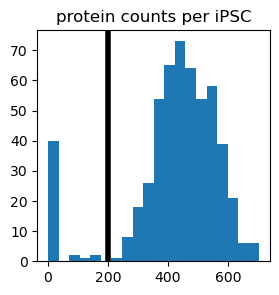

In [39]:
plt.rcParams['figure.figsize'] = 3,3
ax = plt.hist(non_zero_counts, bins=20)
plt.title('protein counts per iPSC')
plt.axvline(200, lw=4, c='black')
plt.grid(False)
#plt.savefig('../plots/ipsc-proteins-histogram.svg', bbox_inches='tight')

In [40]:
len(non_zero_counts==0)

538

In [41]:
df.T

Genes,SNRPGP15,NACA,AGPS,DDX39A,PDLIM1,ACOT7,O00193,PSMD11,PSMD12,CLIC1,...,STRAP,RTCB,RPL36,HYOU1,SUPT16H,TIMM8B,TIMM13,RBM8A,PSAT1,CLIC4
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,0.000,281.851,187.801,0.000,0.000,0.000,0.000,221.665,0.000,511.840,...,192.282,0.000,0.000,230.520,0.000,0.000,249.536,0.000,207.6020,0.0
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,0.000,251.721,0.000,202.151,0.000,403.803,0.000,0.000,165.113,471.518,...,139.630,0.000,439.113,324.782,278.188,0.000,209.552,0.000,293.6120,0.0
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,250.422,206.094,180.088,0.000,374.755,442.981,0.000,137.226,0.000,477.079,...,226.362,142.744,471.594,314.731,328.659,106.241,190.280,0.000,183.2070,0.0
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GB1_1_32293,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA2_1_31969,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,0.000,568.705,0.000,174.496,0.000,539.633,90.517,236.330,0.000,558.147,...,140.601,0.000,0.000,370.261,0.000,0.000,211.280,239.030,243.6180,0.0
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,0.000,237.802,0.000,0.000,0.000,299.647,0.000,202.720,234.546,533.208,...,0.000,111.550,244.993,236.938,0.000,0.000,0.000,0.000,93.9972,0.0
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,0.000,605.490,0.000,0.000,0.000,454.121,0.000,224.960,169.774,506.004,...,311.068,0.000,0.000,272.804,273.820,0.000,152.039,239.866,236.4620,0.0
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,0.000,220.544,0.000,0.000,0.000,0.000,0.000,0.000,0.000,371.572,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,183.1020,0.0


In [42]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.10.1 anndata==0.10.7 umap==0.5.6 numpy==1.26.4 scipy==1.12.0 pandas==2.1.4 scikit-learn==1.2.2 statsmodels==0.14.0 igraph==0.11.4 pynndescent==0.5.12


In [43]:
df.drop('P00761', inplace=True)  # drop trypsin, which is the highest abundance because we add it for proteolysis

In [44]:
data = ad.AnnData(df.T)

In [45]:
#data.to_df().to_csv('../data/cleaned_fibers_todf.csv')
#data.obs.to_csv('../data/cleaned_fibers.obs.csv')

In [46]:
data_alive = data
data_alive.raw = data

normalizing counts per cell
    finished (0:00:00)


C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\preprocessing\_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


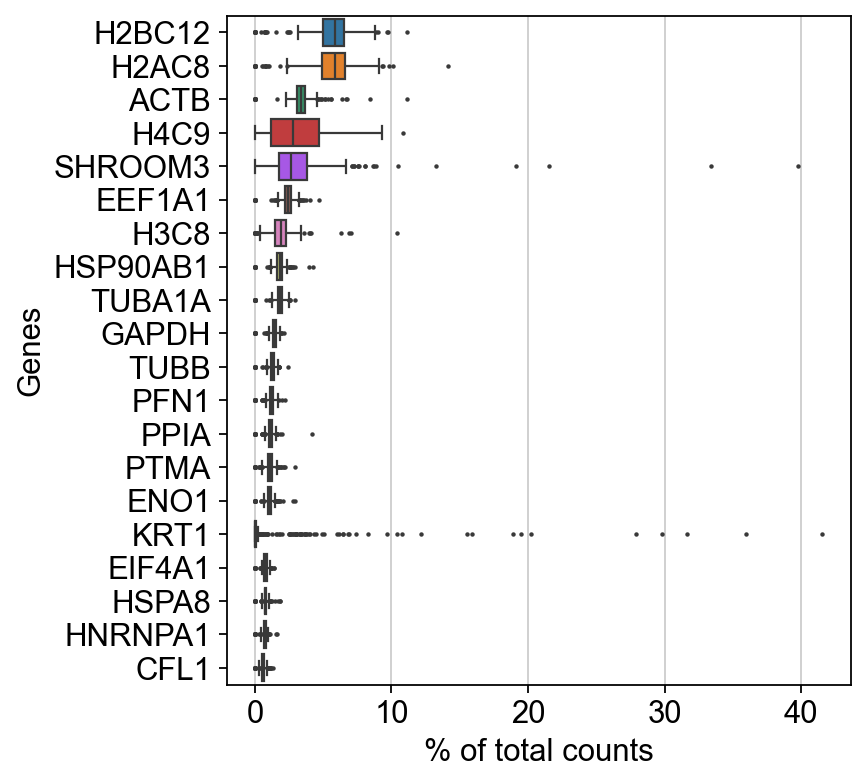

In [47]:
sc.pl.highest_expr_genes(data_alive, n_top=20, save='most-abundant-proteins.svg')

In [48]:
sc.pp.filter_cells(data_alive, min_genes=200)
sc.pp.filter_genes(data_alive, min_cells=10)

filtered out 45 cells that have less than 200 genes expressed
filtered out 27 genes that are detected in less than 10 cells


In [49]:
#sc.pp.filter_cells(data_alive, min_genes=50)

In [50]:
data_alive.obs

,n_genes
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244
...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360


In [51]:

# annotate the group of mitochondrial genes as "mt"
#data_alive.var["mt"] = data_alive.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    data_alive, expr_type='counts', var_type='genes', use_raw=False, log1p=False)
data_alive.obs

,n_genes
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244
...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360


In [52]:
#adata = data_alive[data_alive.obs.n_genes_by_counts < 2500, :]
#adata = data_alive[data_alive.obs.pct_counts_mt < 5, :].copy()

In [53]:
data_alive.obs['total_counts'] = data_alive.to_df().sum(axis=1)

In [54]:
data_alive.var_names_make_unique()

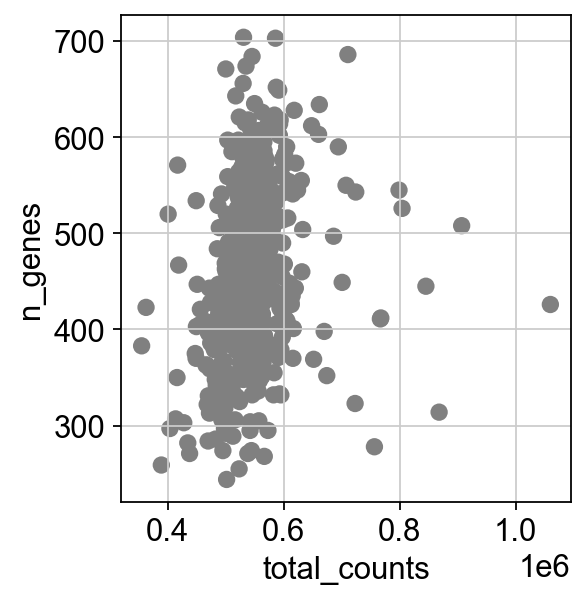

In [55]:
sc.pl.scatter(data_alive, x="total_counts", y="n_genes", save= 'genes_vs_counts.svg')

In [56]:
sc.pp.normalize_total(data_alive, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [57]:
sc.pp.log1p(data_alive)

In [58]:
sc.pp.regress_out(data_alive, ["n_genes"])

regressing out ['n_genes']
    finished (0:00:12)


In [59]:
sc.pp.scale(data_alive, max_value=10)

In [60]:
data_alive.obs["counts"] = list(data_alive.to_df().sum(axis=1))


In [61]:
data_alive.obs

,n_genes,total_counts,counts
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520,400999.5990,203.098533
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585,510948.0194,66.044454
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454,535491.4246,75.967901
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244,501818.3050,-108.383373
...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504,633012.5641,-49.989715
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359,495553.3897,26.119254
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518,581780.5719,36.729117
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360,549537.3432,-0.904378


In [63]:
## read the group assignments and add them to data_alive.obs
df_meta = pd.read_csv('../data/2025/updated_group_assignments.csv')
df_meta['Sample'] = [x.split('.')[0] for x in df_meta['Sample']]
df_meta.set_index('Sample', inplace=True)
# Subset to only rows that match the adata.obs index
df_meta = df_meta.loc[df_meta.index.intersection(data_alive.obs.index)]
df_meta.sort_index()


,Batch,Raw_Well,Corrected_Well,Assigned_Group
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,Batch1,19,18,Unknown
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,Batch1,21,20,Unknown
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,Batch1,9,8,nomC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA10_1_31977,Batch1,10,9,nomC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA11_1_31978,Batch1,11,10,nomC
...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP5_1_32595,Batch2,5,4,mC
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP6_1_32596,Batch2,6,5,mC
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP7_1_32597,Batch2,7,6,mC
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP8_1_32598,Batch2,8,7,nomC


In [65]:
data_alive.obs.sort_index()

,n_genes,total_counts,counts
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520,400999.5990,203.098533
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585,510948.0194,66.044454
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA10_1_31977,582,601901.5740,-125.943381
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA11_1_31978,419,509050.4756,49.153835
...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP5_1_32595,476,569813.6017,-69.843084
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP6_1_32596,499,576887.3387,-13.902970
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP7_1_32597,295,573082.2770,-35.427852
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP8_1_32598,468,601402.0320,-107.331343


In [66]:
# Merge into adata.obs
data_alive.obs = data_alive.obs.join(df_meta, how='left')

# Confirm
#data_alive.obs[['Batch', 'Raw_Well', 'Corrected_Well', 'Assigned_Group']].head()

In [67]:
df_meta

,Batch,Raw_Well,Corrected_Well,Assigned_Group
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,Batch1,3,2,mC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,Batch1,4,3,mC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972,Batch1,5,4,mC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973,Batch1,6,5,mC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA7_1_31974,Batch1,7,6,mC
...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,Batch2,13,12,nomC
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,Batch2,14,13,negative
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,Batch2,15,14,negative
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,Batch2,16,15,negative


In [68]:
data_alive.obs

,n_genes,total_counts,counts,Batch,Raw_Well,Corrected_Well,Assigned_Group
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813,Batch1,9,8,nomC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520,400999.5990,203.098533,Batch1,19,18,Unknown
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585,510948.0194,66.044454,Batch1,21,20,Unknown
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454,535491.4246,75.967901,Batch1,3,2,mC
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244,501818.3050,-108.383373,Batch1,4,3,mC
...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504,633012.5641,-49.989715,Batch2,13,12,nomC
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359,495553.3897,26.119254,Batch2,14,13,negative
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518,581780.5719,36.729117,Batch2,15,14,negative
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360,549537.3432,-0.904378,Batch2,16,15,negative


In [69]:
#data_alive.obs.index.str.startswith('STD')

In [70]:
data_alive.obs['stdgroup'] = ['std' if index.startswith('STD') else 'sample' for index in data_alive.obs.index]

In [71]:
data_alive.obs

,n_genes,total_counts,counts,Batch,Raw_Well,Corrected_Well,Assigned_Group,stdgroup
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813,Batch1,9,8,nomC,sample
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA19_1_32030,520,400999.5990,203.098533,Batch1,19,18,Unknown,sample
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA21_1_32101,585,510948.0194,66.044454,Batch1,21,20,Unknown,sample
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454,535491.4246,75.967901,Batch1,3,2,mC,sample
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244,501818.3050,-108.383373,Batch1,4,3,mC,sample
...,...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504,633012.5641,-49.989715,Batch2,13,12,nomC,sample
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359,495553.3897,26.119254,Batch2,14,13,negative,sample
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518,581780.5719,36.729117,Batch2,15,14,negative,sample
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360,549537.3432,-0.904378,Batch2,16,15,negative,sample


In [72]:
adata = data_alive[data_alive.obs["Assigned_Group"] != "Unknown"].copy()

In [73]:
import re

# Extract line info from the index using regex
adata.obs["line"] = adata.obs.index.to_series().apply(
    lambda x: re.search(r'_D(2|11)_', x).group(0).strip('_') if re.search(r'_D(2|11)_', x) else "Unknown"
)

In [74]:
adata.obs

,n_genes,total_counts,counts,Batch,Raw_Well,Corrected_Well,Assigned_Group,stdgroup,line
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813,Batch1,9,8,nomC,sample,D2
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454,535491.4246,75.967901,Batch1,3,2,mC,sample,D2
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244,501818.3050,-108.383373,Batch1,4,3,mC,sample,D2
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972,467,419078.1994,42.001068,Batch1,5,4,mC,sample,D2
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973,396,555194.0949,26.881280,Batch1,6,5,mC,sample,D2
...,...,...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504,633012.5641,-49.989715,Batch2,13,12,nomC,sample,D11
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359,495553.3897,26.119254,Batch2,14,13,negative,sample,D11
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518,581780.5719,36.729117,Batch2,15,14,negative,sample,D11
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360,549537.3432,-0.904378,Batch2,16,15,negative,sample,D11


In [75]:
sc.pp.combat(adata, key='Batch')

Standardizing Data across genes.

Found 2 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



In [76]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:09)


In [77]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=.4, random_state=42)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 3 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


C:\Users\MeyerJ\AppData\Local\Temp\ipykernel_47528\2344393470.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=.4, random_state=42)


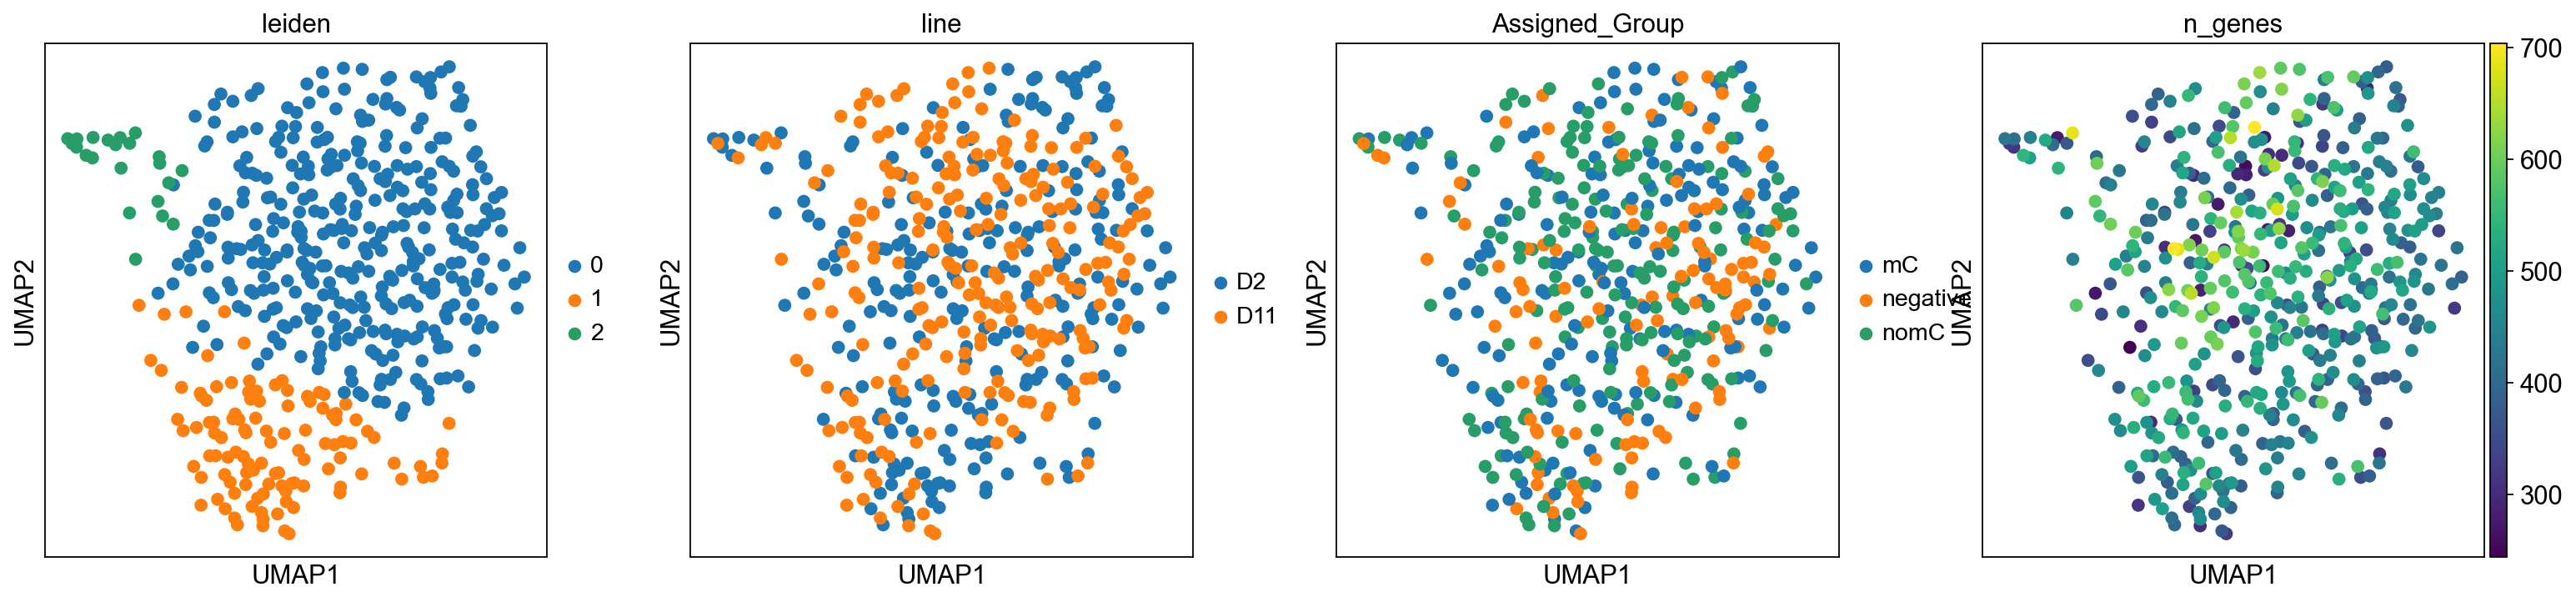

In [78]:
plt.rcParams['figure.figsize'] = 5,5
#fig, axs = plt.subplots(1,2, figsize=(8,3),constrained_layout=True)
#sc.pl.umap(data_alive, color=['leiden','line', 'group', 'n_genes'], show=False, use_raw=True, size=200, ncols=2)
sc.pl.umap(adata, color=['leiden', 'line', 'Assigned_Group', 'n_genes'], show=False, use_raw=True, size=200, ncols=4)
plt.show()

In [79]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\MeyerJ\AppData\Roaming\Python\Python311\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_gr

In [80]:
sc.tl.dendrogram(adata, groupby='leiden')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


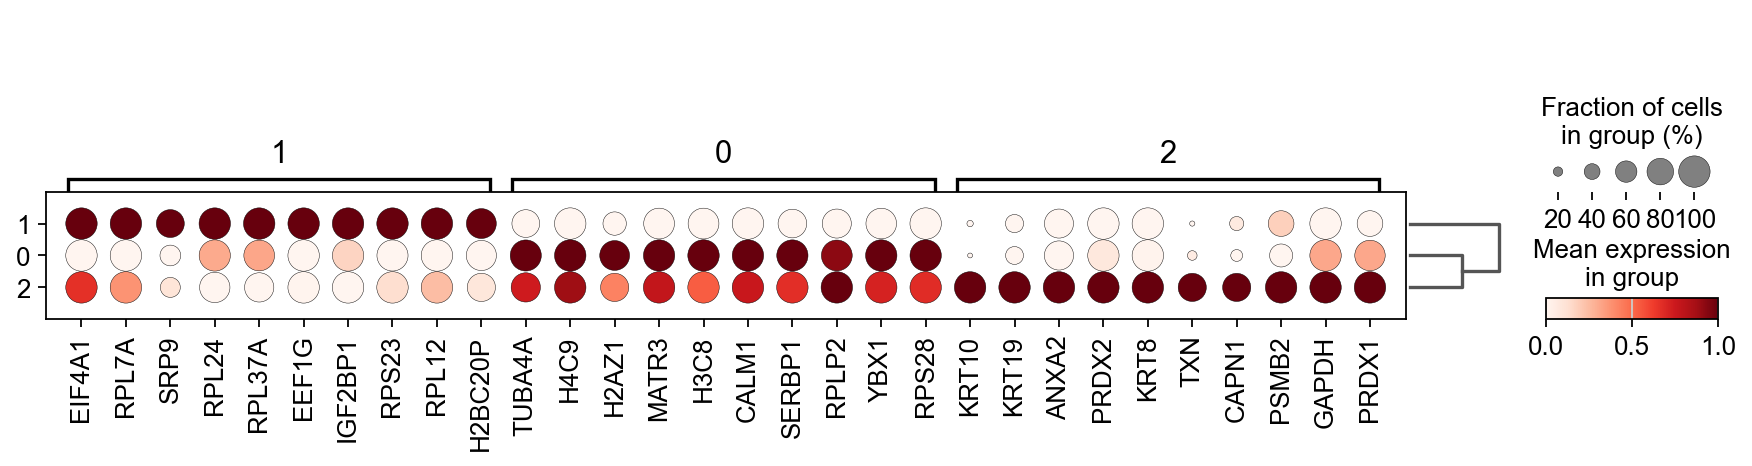

In [81]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden", standard_scale="var", n_genes=10, save='dotplot.svg'
)

#plt.savefig('../plots/res1_markers.svg')

In [82]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
       'MLF1IP', 'RFC2', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7',
       'POLD3', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN',
       'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1',
       'E2F8'],
      dtype='object')
    finished: added
    'S_score', score of gene set (adata.obs).
    294 total control genes are used. (0:00:00)
computing score 'G2M_score'
       'NUF2', 'CKS1B', 'MKI67', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2',
       'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'GTSE1',
       'KIF20B', 'HJURP', 'CDCA3', 'HN1', 'CDC20', 'TTK', 'CDC25C', 'KIF2C',
       'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 'AURKA',
       'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE', 'CTCF', 'NEK2', 'G2E3',
       'GAS2L3', 'CENPA'],
      dtype='object')
    finished: added
    'G2M_score', score of gene set (adata.obs).
    185 total control genes are use

In [83]:
cell_cycle_genes

['MCM5',
 'PCNA',
 'FEN1',
 'MCM2',
 'MCM4',
 'MCM6',
 'HELLS',
 'RPA2',
 'NASP',
 'MSH2',
 'CDK1',
 'TMPO',
 'TUBB4B',
 'RANGAP1',
 'CBX5']

In [84]:
adata.obs

,n_genes,total_counts,counts,Batch,Raw_Well,Corrected_Well,Assigned_Group,stdgroup,line,leiden,S_score,G2M_score,phase
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_GA9_1_32167,460,500963.1690,55.697813,Batch1,9,8,nomC,sample,D2,0,13.356857,31.013463,G2M
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA3_1_31970,454,535491.4246,75.967901,Batch1,3,2,mC,sample,D2,1,-13.708247,37.119478,G2M
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA4_1_31971,244,501818.3050,-108.383373,Batch1,4,3,mC,sample,D2,0,-80.917698,-23.492086,G1
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA5_1_31972,467,419078.1994,42.001068,Batch1,5,4,mC,sample,D2,1,30.646814,3.122346,S
V:\TimsTOF-SCP\Data\240813_1_254_D2\1_254_D2_RA6_1_31973,396,555194.0949,26.881280,Batch1,6,5,mC,sample,D2,1,-76.762211,81.084095,G2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP13_1_32603,504,633012.5641,-49.989715,Batch2,13,12,nomC,sample,D11,0,12.871441,-39.940351,S
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP14_1_32604,359,495553.3897,26.119254,Batch2,14,13,negative,sample,D11,0,-58.736997,0.659045,G2M
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP15_1_32605,518,581780.5719,36.729117,Batch2,15,14,negative,sample,D11,0,56.717648,-4.625592,S
V:\TimsTOF-SCP\Data\240816_2inch_254_D11\2_254_D11_RP16_1_32606,360,549537.3432,-0.904378,Batch2,16,15,negative,sample,D11,0,-25.241780,66.733741,G2M


In [85]:
adata.obs['leiden'].value_counts()

leiden
0    359
1    110
2     22
Name: count, dtype: int64

In [86]:
len(adata.obs)

491

In [87]:
21/(len(adata.obs))

0.04276985743380855

In [88]:
#fig, axs = plt.subplots(1,2, figsize=(8,3),constrained_layout=True)
sc.pl.umap(adata, color=['leiden', 'line', 'Assigned_Group', 'n_genes', 'phase'], show=False, use_raw=True, s=80, ncols=5, save='umap5.svg')


[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'line'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Assigned_Group'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'n_genes'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'phase'}, xlabel='UMAP1', ylabel='UMAP2'>]

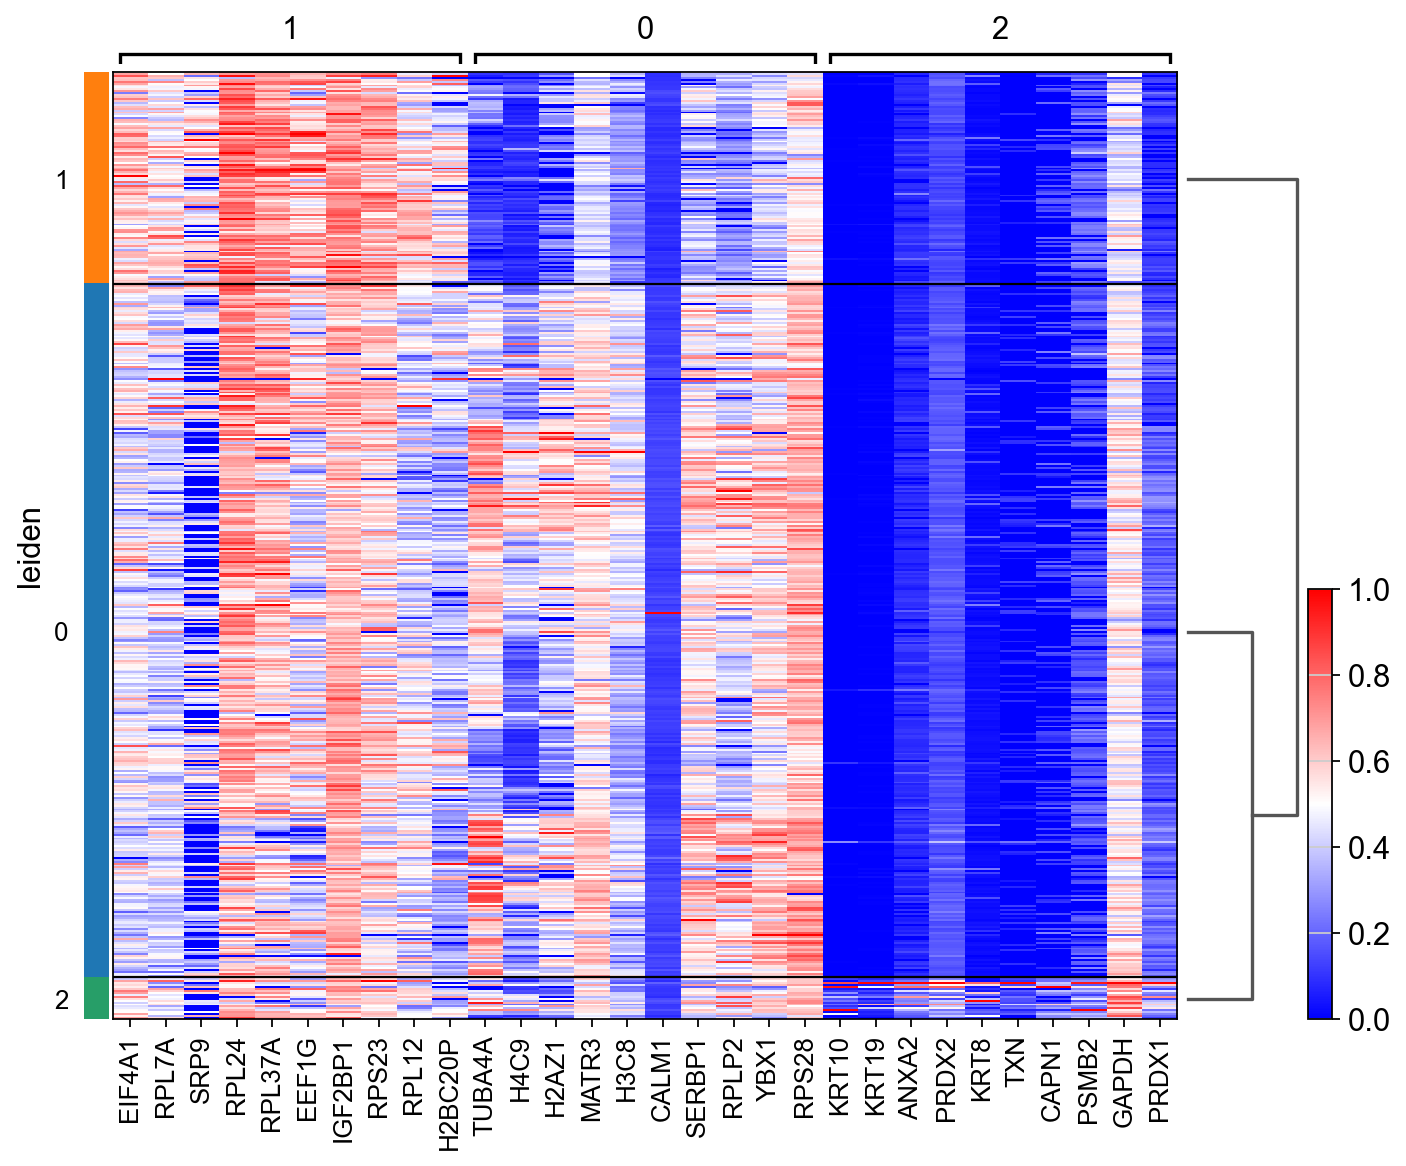

In [89]:
sc.pl.rank_genes_groups_heatmap(
    adata, 
    groupby='leiden', 
    n_genes=10,  # Number of top genes to show per cluster
    standard_scale='var',  # Z-score scaling (standardizes each gene across clusters)
    cmap='bwr',  # Blue-white-red colormap for clear z-score visualization
    show_gene_labels=True,
    dendrogram=True,
    figsize=(10,8), 
    save='hm.svg'
)
#plt.savefig('../plots/hm.svg', bbox_inches=False)

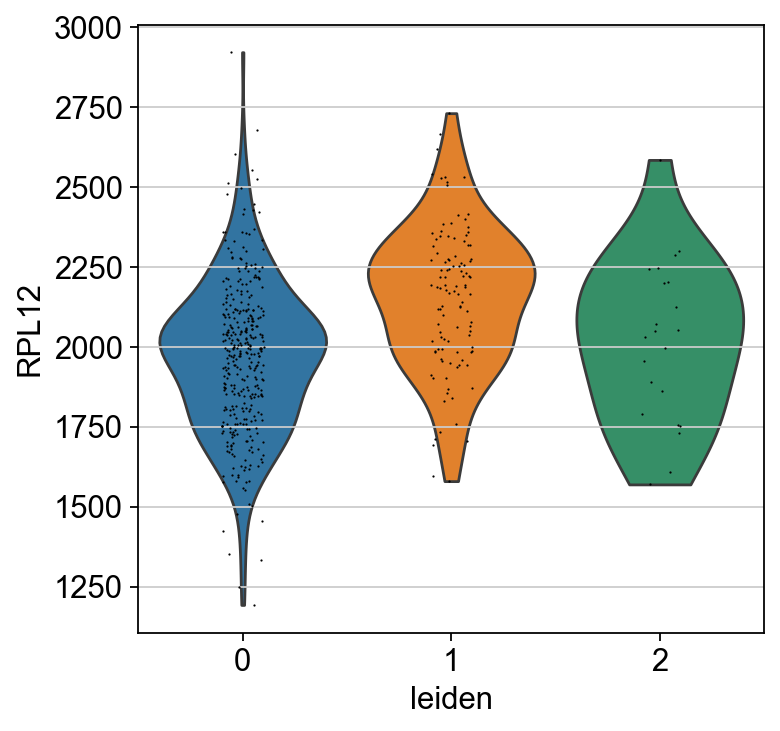

In [90]:
sc.pl.violin(adata, keys=['RPL12'], groupby='leiden', jitter=True, use_raw=True, save='rpl12.svg')

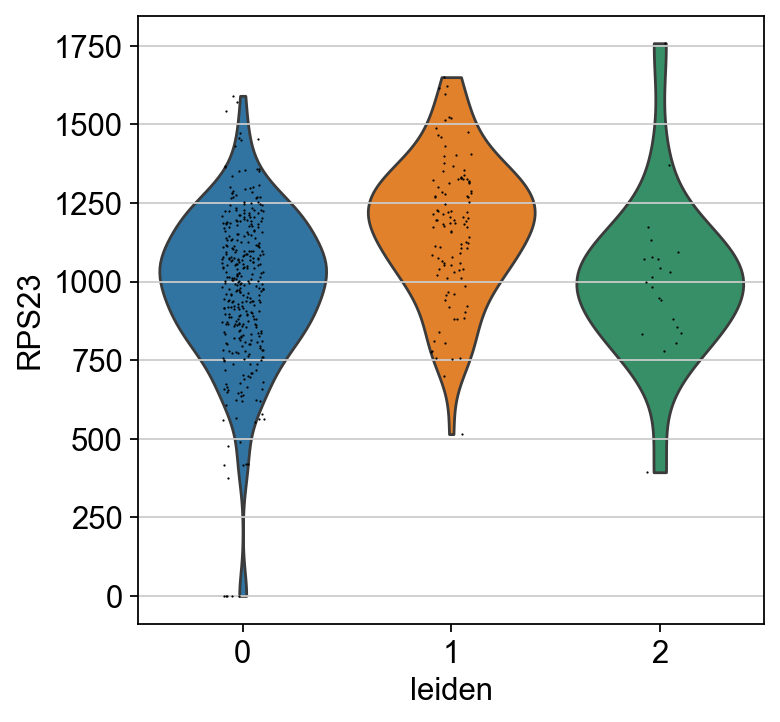

In [91]:
sc.pl.violin(adata, keys=['RPS23'], groupby='leiden', jitter=True, use_raw=True, save='rps23.svg')

[<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'RPS28'}, xlabel='UMAP1', ylabel='UMAP2'>]

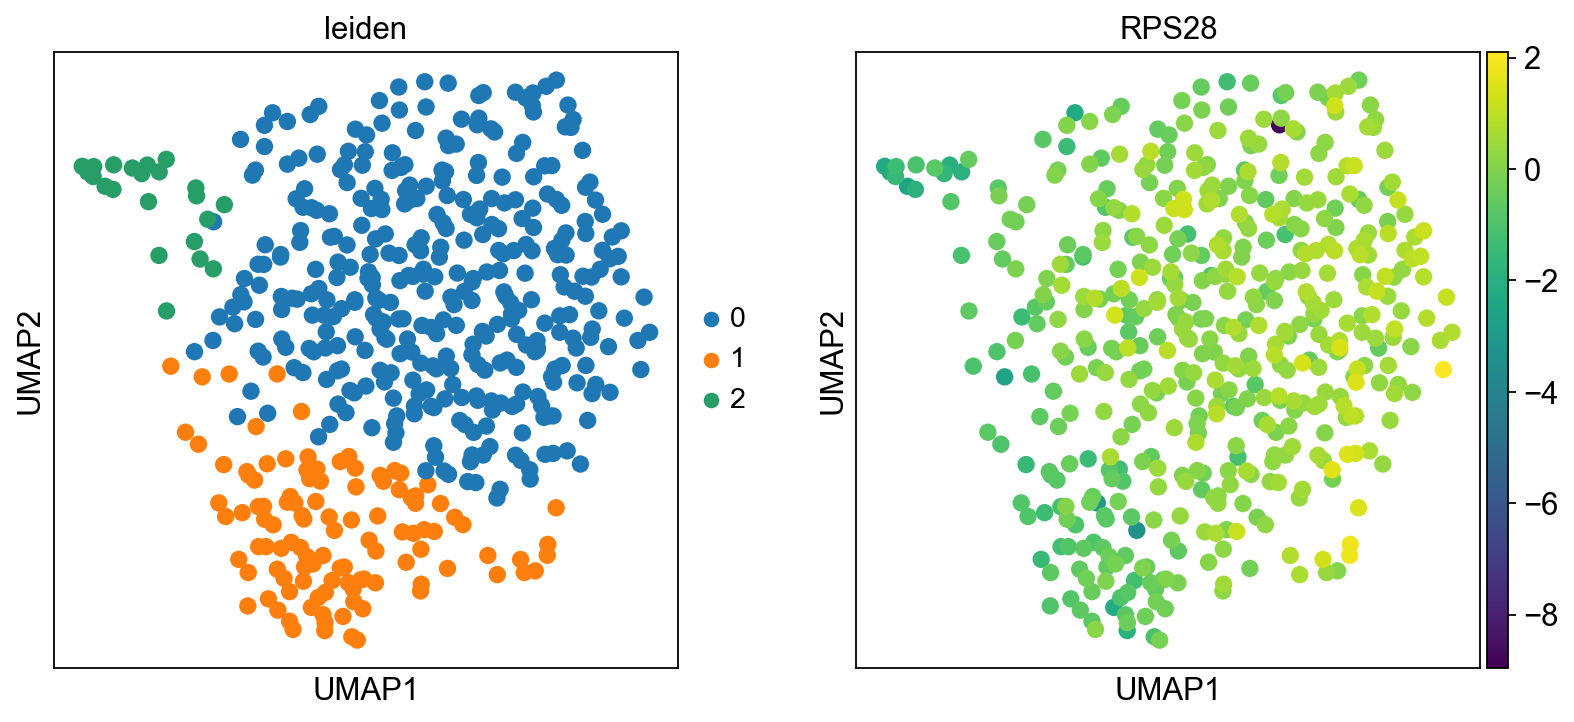

In [92]:
#fig, axs = plt.subplots(1,2, figsize=(8,3),constrained_layout=True)
sc.pl.umap(adata, color=['leiden', 'RPS28'], show=False, use_raw=False)
